In [2]:
import matplotlib.pyplot as plt
import cv2


In [3]:
config_file="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="frozen_inference_graph.pb"

In [4]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)


In [7]:
classLabels=[]
file_name="Labels.txt"
with open(file_name, "rt") as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [8]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
print(len(classLabels))

80


In [36]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ##255/2=127.5
model.setInputMean((127.5,127.5,127.5))##Mobilenet =>[-1,1]
model.setInputSwapRB(True)


<dnn_Model 000002DA67E9FBD0>

read an image

In [18]:
img=cv2.imread("man_tuxedo_car_style_27329_1920x1080.jpg")

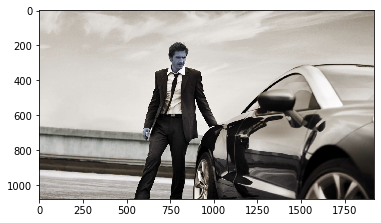

In [19]:
plt.imshow(img)#bgr

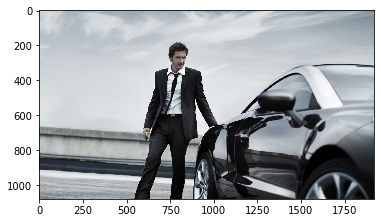

In [20]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [37]:
ClassIndex , confidece, bbox=model.detect(img,confThreshold=0.5)

In [38]:
print(ClassIndex)

[[1]
 [3]]


In [39]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf , boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    #cv2.rectangle(frame , (x,y),(x+w,y+h),(255,0,0),2)
    #cv2.putText(image, text, (text_offset_x,text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)

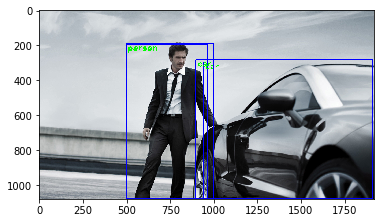

In [41]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

video demo

In [44]:
cap= cv2.VideoCapture("video_dataset.mp4")

#check video is opened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex ,Confidece ,bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf , boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(img,boxes,(255,0,0),2)
                cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)

    cv2.imshow("Object Detection Tutorial",frame)
    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

        
        
        

[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]

[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
